In [1]:
import torch
import math

##simulation
print('& LATE & MLATE\\\\')
print('Method & $\\alpha_0$ & $\\alpha_1$ & $\\alpha_0$ & $\\alpha_1$\\\\')
for method in ['mle', 'dru', 'drw']:
    for mis in ['bth', 'opc', 'psc', 'bad']:
        print('{}.{}&'.format(method, mis), end='')
        for estimator in ['LATE', 'MLATE']:
            result = torch.load('{}_{}_{}.pt'.format(method, mis, estimator))
            bias = torch.abs(result.mean(0) - torch.tensor([0.0,-1.0])) * 100
            std = torch.sqrt(torch.mean((result - torch.tensor([0.0,-1.0]))**2, 0)) / math.sqrt(result.shape[0]) * 100
            print('{:.02f} ({:.02f}) & '.format(bias[0].item(), std[0].item()), end='')
            print('{:.02f} ({:.02f})'.format(bias[1].item(), std[1].item()), end='')
            if estimator == 'LATE':
                print('&',end='')
        print('\\\\')

& LATE & MLATE\\
Method & $\alpha_0$ & $\alpha_1$ & $\alpha_0$ & $\alpha_1$\\
mle.bth&4.55 (0.44) & 9.31 (0.93)&13.81 (0.81) & 18.33 (1.32)\\
mle.opc&5.86 (0.48) & 11.94 (0.95)&16.47 (0.85) & 21.11 (1.35)\\
mle.psc&5.86 (0.48) & 11.94 (0.95)&16.47 (0.85) & 21.11 (1.35)\\
mle.bad&19.15 (0.69) & 2.80 (0.62)&41.28 (1.46) & 0.53 (1.05)\\
dru.bth&0.95 (0.45) & 6.16 (1.04)&3.58 (1.00) & 9.75 (1.79)\\
dru.opc&1.21 (0.43) & 4.55 (0.97)&0.02 (1.05) & 10.78 (1.99)\\
dru.psc&1.21 (0.43) & 4.55 (0.97)&0.02 (1.05) & 10.78 (1.99)\\
dru.bad&15.25 (0.70) & 29.99 (1.80)&25.23 (1.43) & 17.30 (2.56)\\
drw.bth&0.29 (1.04) & 1.55 (1.20)&3.04 (1.24) & 4.75 (1.77)\\
drw.opc&3.71 (1.27) & 0.63 (1.45)&0.30 (1.10) & 6.39 (1.78)\\
drw.psc&3.71 (1.27) & 0.63 (1.45)&0.30 (1.10) & 6.39 (1.78)\\
drw.bad&10.97 (0.56) & 13.68 (1.19)&29.54 (1.65) & 4.18 (2.59)\\


In [2]:
## real_data
from scipy.stats import norm
real_mlealphas = torch.load('real_mlealphas.pt')
real_drwalphas = torch.load('real_drwalphas.pt')

sort_idx_mle = torch.argsort(real_mlealphas, dim=0)
sort_idx_drw = torch.argsort(real_drwalphas, dim=0)
# sort_idx_mle = sort_idx_mle[5:-5]
# sort_idx_drw = sort_idx_drw[5:-5]
print(sort_idx_mle)
mle_LB = real_mlealphas.gather(dim=0, index=sort_idx_mle[-25].unsqueeze(0)).squeeze()
mle_UB = real_mlealphas.gather(dim=0, index=sort_idx_mle[25].unsqueeze(0)).squeeze()
drw_LB = real_drwalphas.gather(dim=0, index=sort_idx_drw[-25].unsqueeze(0)).squeeze()
drw_UB = real_drwalphas.gather(dim=0, index=sort_idx_drw[25].unsqueeze(0)).squeeze()
# mle_mean = torch.mean(real_mlealphas, dim=0)
# drw_mean = torch.mean(real_drwalphas, dim=0)
# mle_std = torch.std(real_mlealphas, dim=0)
# drw_std = torch.std(real_drwalphas, dim=0)

# mle_LB = mle_mean + norm.ppf(0.025) * mle_std / math.sqrt(real_mlealphas.shape[0])
# mle_UB = mle_mean + norm.ppf(0.975) * mle_std / math.sqrt(real_mlealphas.shape[0])
# drw_LB = drw_mean + norm.ppf(0.025) * drw_std / math.sqrt(real_drwalphas.shape[0])
# drw_UB = drw_mean + norm.ppf(0.975) * drw_std / math.sqrt(real_drwalphas.shape[0])

LB = torch.stack((mle_LB, drw_LB), dim=0)
UB = torch.stack((mle_UB, drw_UB), dim=0)

tensor([[ 19, 367, 484, 390,  17, 484],
        [484,  26, 217, 491, 375, 448],
        [448, 400, 416, 225, 337, 416],
        ...,
        [278, 484, 143, 448, 390, 473],
        [213, 448, 356, 484, 285, 400],
        [ 40,  19, 376,  19, 473, 367]])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


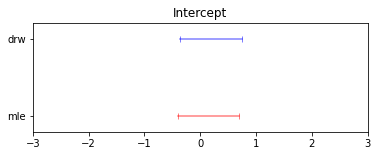

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


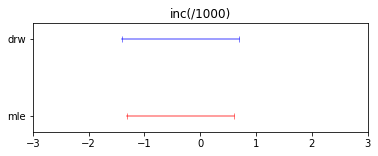

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


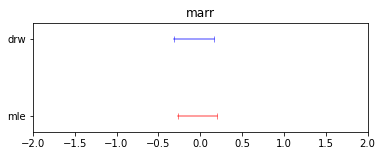

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


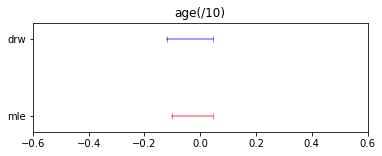

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


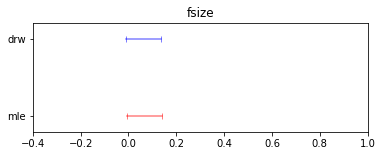

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


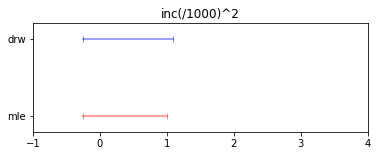

In [4]:
import matplotlib.pyplot as plt
titles = ['Intercept', 'inc(/1000)', 'marr', 'age(/10)', 'fsize', 'inc(/1000)^2']
for i in range(LB.shape[1]):
    plt.figure(figsize=(6,2))
    for lower, upper, y in zip(LB[:,i].tolist(), UB[:,i].tolist(), [0,1]):
        if y==1:
            plt.plot((lower,upper),(y,y),'|-',color='blue', alpha=0.5)
        else:
            plt.plot((lower,upper),(y,y),'|-',color='red', alpha=0.5)
    plt.yticks([0,1], ['mle', 'drw'])
    if i == 0:
        plt.xlim((-3,3))
    elif i == 1:
        plt.xlim((-3,3))
    elif i == 2:
        plt.xlim((-2,2))
    elif i == 3:
        plt.xlim((-0.6,0.6))
    elif i == 4:
        plt.xlim((-0.4,1))
    elif i == 5:
        plt.xlim((-1,4))
    # plt.xlim((-10,10))
    plt.ylim((-0.2,1.2))
    plt.title(titles[i])
    plt.savefig(str(i)+'.eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


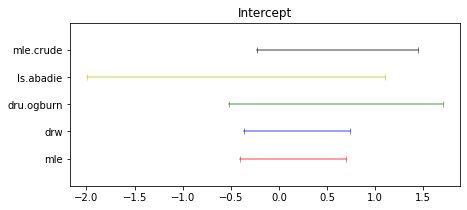

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


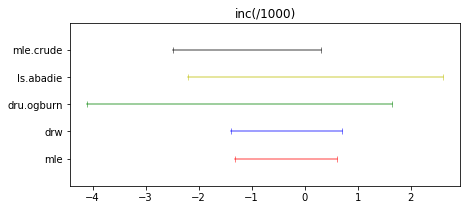

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


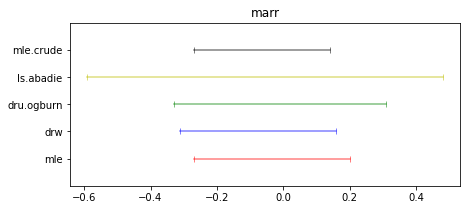

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


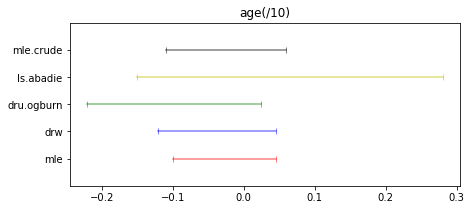

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


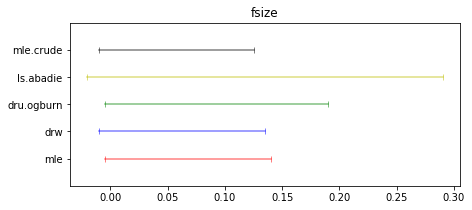

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


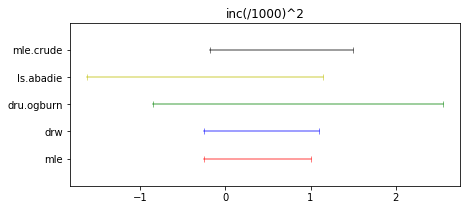

In [5]:
LB = [
    [-0.4, -0.36, -0.52, -1.99, -0.23],
    [-1.32,-1.4, -4.1,  -2.2, -2.48],
    [-0.27, -0.31, -0.33,  -0.59, -0.27],
    [-0.1, -0.12, -0.22, -0.15, -0.11],
    [-0.005, -0.01, -0.005,  -0.02, -0.01],
    [-0.25, -0.25, -0.85, -1.62, -0.18]
]
UB = [
    [0.7, 0.74, 1.7, 1.1, 1.45],
    [0.6, 0.7, 1.65, 2.6, 0.3],
    [0.2, 0.16, 0.31, 0.48, 0.14],
    [0.045, 0.045, 0.025, 0.28, 0.06],
    [0.14, 0.135, 0.19, 0.29, 0.125],
    [1, 1.1, 2.55, 1.15, 1.5]
]
LB = torch.tensor(LB).T
UB = torch.tensor(UB).T
for i in range(LB.shape[1]):
    plt.figure(figsize=(7,3))
    for lower, upper, y in zip(LB[:,i].tolist(), UB[:,i].tolist(), [0,1,2,3,4]):
        if y==1:
            plt.plot((lower,upper),(y,y),'|-',color='blue', alpha=0.5)
        elif y==0:
            plt.plot((lower,upper),(y,y),'|-',color='red', alpha=0.5)
        elif y==2:
            plt.plot((lower,upper),(y,y),'|-',color='g', alpha=0.5)
        elif y==3:
            plt.plot((lower,upper),(y,y),'|-',color='y', alpha=0.5)
        elif y==4:
            plt.plot((lower,upper),(y,y),'|-',color='k', alpha=0.5)
    plt.yticks([0,1,2,3,4], ['mle', 'drw', 'dru.ogburn',  'ls.abadie', 'mle.crude'])
    #plt.xlim((-1,6))
    plt.ylim((-1, 5))
    plt.title(titles[i])
    plt.savefig('all' +str(i)+'.eps')
    plt.show()

In [29]:
data = torch.load('../codes/401k.pt')
data[:,1] /= 100
data[:,4] /= 10
data[:,9] /= 10000
X = torch.cat((torch.ones((data.shape[0],1)), data[:, [1,2,3,5,9]]), dim=-1)
X_marr = torch.median(X[X[:,2] > 0.5], dim=0)[0]
X_unmarr = torch.median(X[X[:,2] < 0.5], dim=0)[0]
drw_MLATE_marr = torch.exp(X_marr @ real_drwalphas.T)
mle_MLATE_marr = torch.exp(X_marr @ real_mlealphas.T)
drw_MLATE_unmarr = torch.exp(X_unmarr @ real_drwalphas.T)
mle_MLATE_unmarr = torch.exp(X_unmarr @ real_mlealphas.T)

In [31]:
X_marr, X_unmarr

(tensor([1.0000, 0.4051, 1.0000, 0.0000, 4.0000, 0.1641]),
 tensor([1.0000, 0.2372, 0.0000, 0.0000, 1.0000, 0.0563]))

In [30]:
for tsr in [drw_MLATE_marr, mle_MLATE_marr, drw_MLATE_unmarr, mle_MLATE_unmarr]:
    idx = torch.argsort(tsr)
    print(tsr[idx[-50]], tsr[idx[50]])

tensor(4.1024) tensor(0.3922)
tensor(2.3900) tensor(0.5561)
tensor(2.3072) tensor(0.2844)
tensor(1.7441) tensor(0.6587)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


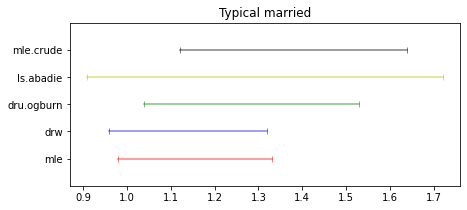

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


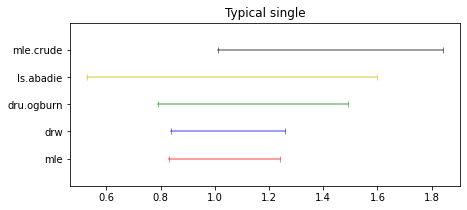

In [23]:
LB = [
    [0.98, 0.96, 1.04, 0.91, 1.12],
    [0.83, 0.84, 0.79, 0.53, 1.01]
]
UB = [
    [1.33, 1.32, 1.53, 1.72, 1.64],
    [1.24, 1.26, 1.49, 1.60, 1.84]
]
LB = torch.tensor(LB).T
UB = torch.tensor(UB).T
titles = ['Typical married', 'Typical single']
for i in range(LB.shape[1]):
    plt.figure(figsize=(7,3))
    for lower, upper, y in zip(LB[:,i].tolist(), UB[:,i].tolist(), [0,1,2,3,4]):
        if y==1:
            plt.plot((lower,upper),(y,y),'|-',color='blue', alpha=0.5)
        elif y==0:
            plt.plot((lower,upper),(y,y),'|-',color='red', alpha=0.5)
        elif y==2:
            plt.plot((lower,upper),(y,y),'|-',color='g', alpha=0.5)
        elif y==3:
            plt.plot((lower,upper),(y,y),'|-',color='y', alpha=0.5)
        elif y==4:
            plt.plot((lower,upper),(y,y),'|-',color='k', alpha=0.5)
    plt.yticks([0,1,2,3,4], ['mle', 'drw', 'dru.ogburn',  'ls.abadie', 'mle.crude'])
    #plt.xlim((-1,6))
    plt.ylim((-1, 5))
    plt.title(titles[i])
    plt.savefig('typical' +str(i)+'.eps')
    plt.show()